In [1]:
import pandas as pd
import numpy as np


In [4]:
data=pd.read_csv('DigitalAd_dataset.csv')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     400 non-null    int64
 1   Salary  400 non-null    int64
 2   Status  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [6]:
data.head()

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1


In [8]:
data.shape

(400, 3)

In [9]:
X_features=['Age','Salary']
Y_feature=['Status']

In [ ]:
X=data[X_features]
Y=data[Y_feature]

In [28]:
from sklearn.preprocessing import StandardScaler
stan_sclr=StandardScaler()
new_x=pd.DataFrame(stan_sclr.fit_transform(X))

In [29]:
new_x

,0,1
0,-1.877311,0.359940
1,-0.826666,0.301210
2,0.892570,-1.313857
3,0.701544,-1.284492
4,0.797057,-1.225763
...,...,...
395,-0.253587,-0.139263
396,-1.113206,0.301210
397,-1.113206,-0.521006
398,-1.686284,0.477399


In [30]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(train_x,train_y)

C:\Users\naden\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [46]:
pred_y=LR.predict(test_x)


In [62]:
from sklearn import metrics

In [39]:
accuracy=metrics.accuracy_score(test_y,pred_y)
print('Accuracy:',accuracy*100)

Accuracy: 82.5


In [40]:
print(metrics.confusion_matrix(test_y,pred_y))

[[54  1]
 [13 12]]


In [42]:
print(metrics.classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89        55
           1       0.92      0.48      0.63        25

    accuracy                           0.82        80
   macro avg       0.86      0.73      0.76        80
weighted avg       0.84      0.82      0.81        80



In [59]:
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

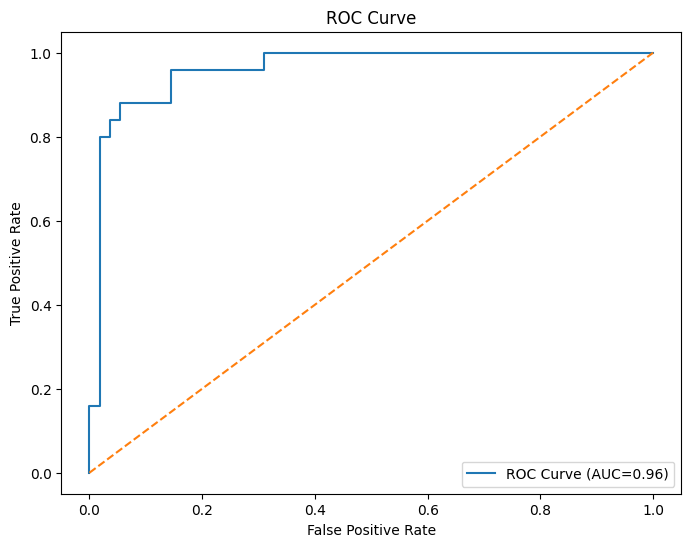

In [61]:
y_prob=LR.predict_proba(test_x)[:,1]
fpr,tpr,thresholds=roc_curve(test_y,y_prob)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f'ROC Curve (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

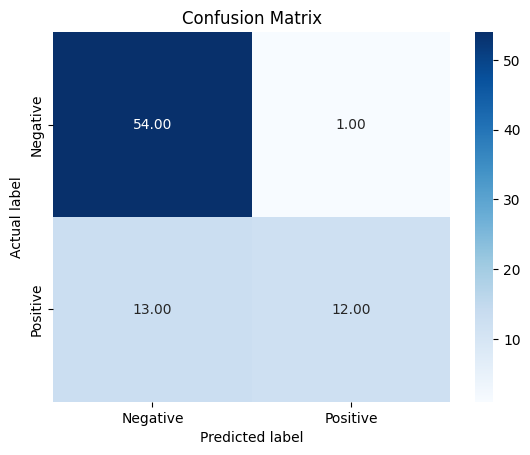

In [68]:
cm=metrics.confusion_matrix(test_y,pred_y)
sns.heatmap(cm,fmt=".2f",annot=True,xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'],cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()